In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import median_filter, gaussian_filter
from skimage.filters import sobel
from skimage import img_as_float
from scipy.ndimage import binary_closing
from scipy.interpolate import griddata
import json
import tifffile as tf
import seaborn as sns
import sys
sys.path.append("../../network_extraction/src/")
from real_data import write_tiff
sys.path.append("../src/")
from surface_extraction import *
import cupy as cp

In [3]:
configs_path = "../configs.json"
with open(configs_path, "r") as f:
    configs = json.load(f)

In [4]:
image = tf.imread(configs["CD44"])

In [5]:
smoothed_image = smooth_image_in_xyz(image)
binary_image = image > 6
top_layer = get_top_layer(binary_image)
binary_image = cp.asnumpy(binary_image)
top_layer_3d = get_layer_in_3d(top_layer, image.shape)

In [6]:
top_layer_interp = interpolate_top_layer(top_layer, image.shape[0], method="nearest")
interp_top_layer_3d = cp.asnumpy(get_layer_in_3d(top_layer_interp, image.shape))

interpolating
done


In [7]:
median_filtered_interp_top_layer = median_filtering_in_xy(top_layer_interp, size=5)
piece_wise_smoothed_top_layer = patch(top_layer, median_filtered_interp_top_layer)
piece_wise_smoothed_top_layer_3d = cp.asnumpy(get_layer_in_3d(piece_wise_smoothed_top_layer, image.shape))

In [8]:
smoothed_top_layer = median_filtering_in_xy(top_layer_interp, size=5)
smoothed_top_layer_3d = cp.asnumpy(get_layer_in_3d(smoothed_top_layer, image.shape))

In [15]:
bin)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

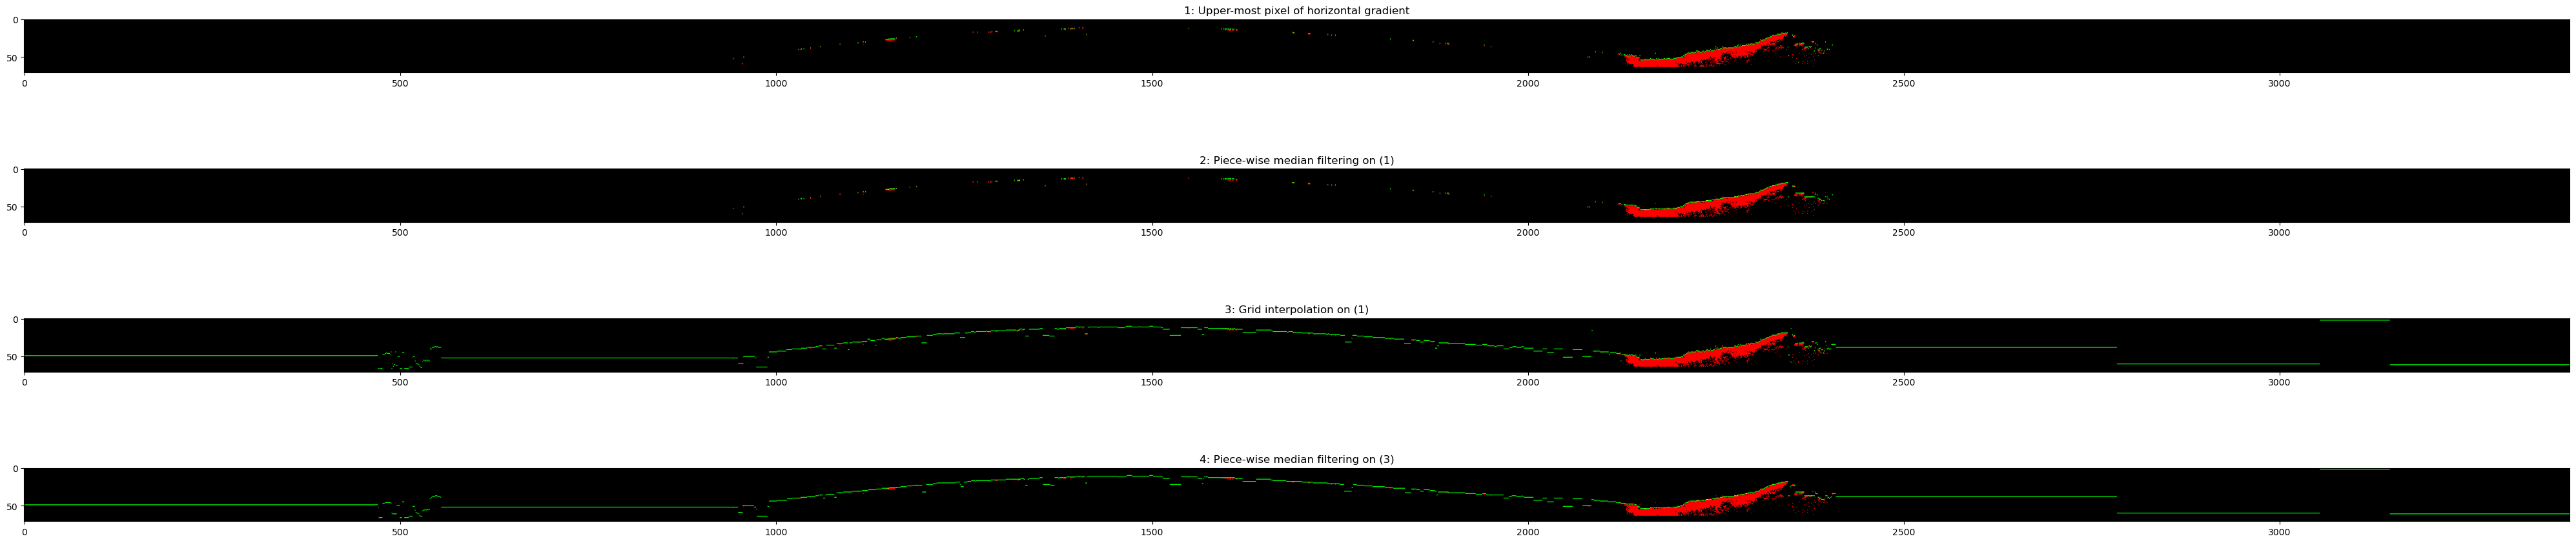

In [19]:
f, axs = plt.subplots(4, figsize=(40,10))
bin = cp.asnumpy(binary_image[:, 100, :])
bin = bin / np.max(bin) * 255

grad = cp.asnumpy(top_layer_3d[:, 100, :])
grad = 255 * grad.astype(float) / np.max(grad)

pw_smooth = piece_wise_smoothed_top_layer_3d[:, 100, :]
pw_smooth = pw_smooth / np.max(pw_smooth) * 255

interp = interp_top_layer_3d[:, 100, :]
interp = interp / np.max(interp) * 255

smooth = smoothed_top_layer_3d[:, 100, :]
smooth = smooth / np.max(smooth) * 255


axs[0].imshow(np.array([bin, grad, np.zeros_like(bin)]).transpose((1, 2, 0)).astype(int))
axs[1].imshow(np.array([bin, pw_smooth, np.zeros_like(bin)]).transpose((1, 2, 0)).astype(int))
axs[2].imshow(np.array([bin, interp, np.zeros_like(bin)]).transpose((1, 2, 0)).astype(int))
axs[3].imshow(np.array([bin, smooth, np.zeros_like(bin)]).transpose((1, 2, 0)).astype(int))

axs[0].set_title("1: Upper-most pixel of horizontal gradient")
axs[1].set_title("2: Piece-wise median filtering on (1)")
axs[2].set_title("3: Grid interpolation on (1)")
axs[3].set_title("4: Piece-wise median filtering on (3)")
plt.tight_layout()

In [ ]:
#write_tiff(configs, "column-wise-first-gradient.tif", top_layer_3d)

In [ ]:
#write_tiff(configs, "piecewise-smoothed-column-wise-first-gradient.tif", piece_wise_smoothed_top_layer_3d)

In [ ]:
#write_tiff(configs, "interpolated_surface.tif", interp_top_layer_3d)

In [ ]:
#write_tiff(configs, "smoothed_interpolated_surface.tif", smoothed_top_layer_3d)